<a href="https://colab.research.google.com/github/lwallac2/Bank-Marketing/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1

In [82]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm

from IPython.display import HTML # This is just for me so I can embed videos
from IPython.display import Image # This is just for me so I can embed images


#Reading in the data as adult dataframe
df = pd.read_csv("https://raw.githubusercontent.com/lwallac2/Bank-Marketing/main/bank-additional.csv", sep=';')

#Verifying that we can see the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [83]:
# We import all the kNN libraries

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline 

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [85]:
df2 = pd.DataFrame(df, columns = ['age', 'duration', 'campaign','pdays','previous','marital'])
df2.head()

,age,duration,campaign,pdays,previous,marital
0,30,487,2,999,0,married
1,39,346,4,999,0,single
2,25,227,1,999,0,married
3,38,17,3,999,0,married
4,47,58,1,999,0,married


In [86]:
# Let's check what the levels of marital are!
df2.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [87]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip # Installing the package first

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (25.9 MB)


In [88]:
x=df2.iloc[:,:4] # all parameters
y=df2['marital'] # class labels 'married', 'single', 'divorced', 'unknown'

#print(x) # Uncomment this line to verify your parameters/ independent variables/ attributes/ features
#print(y) # Uncomment this line to verify your class labels

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

# So, what training data do we have?
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (3089, 4)
y_train shape: (3089,)


In [90]:
# This is the model with the one nearest neighbor. Note the output shows that the metric is set to minkowski, 
# but the p is set to 2, which means that we are using Euclidian distance (1 = Manhattan distance)

from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [91]:
y_pred = model1.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 ['married' 'married' 'married' ... 'married' 'single' 'married']


In [93]:
# Let's compare the actual y and the predicted y

realvsmodel1 = pd.DataFrame(y_pred,y_test)
realvsmodel1 = pd.DataFrame({'predicted':y_pred,'original':y_test})
realvsmodel1.head()

,predicted,original
3754,married,married
45,married,single
2774,married,single
1170,single,single
4042,single,single


## Question 2

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (2759, 4)
y_train shape: (2759,)
X_test shape: (1360, 4)
y_test shape: (1360,)


## Question 3

In [97]:
model5 = neighbors.KNeighborsClassifier(n_neighbors=1)

model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)

In [124]:
# Accuracy score
print("Test set score: {:.2f}".format(model5.score(X_test, y_test)))

Test set score: 0.54


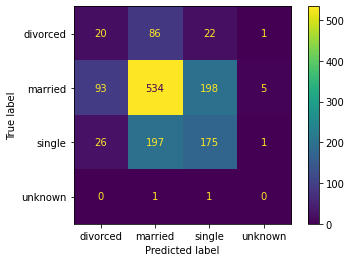

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model5,X_test,y_test)

In [99]:
print(classification_report(y_test, y_pred, labels=['married', 'single', 'divorced', 'unknown']))

              precision    recall  f1-score   support

     married       0.65      0.64      0.65       830
      single       0.44      0.44      0.44       399
    divorced       0.14      0.16      0.15       129
     unknown       0.00      0.00      0.00         2

    accuracy                           0.54      1360
   macro avg       0.31      0.31      0.31      1360
weighted avg       0.54      0.54      0.54      1360



## Question 4

In [100]:
# To determine how to pick k, we are first creating a list of potential k values
klist = list(range(1,50,2)) # Our list goes from 1 to 50 in increments of 2

# Then we create an empty list that will hold cross-validation scores
cv_scores = []

In [101]:
# Perform 10-fold cross validation for each k value (we have a small dataset, so we can do this)
for k in klist:
    model10 = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model10, x, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Changing to misclassification error
errors = 1- np.array(cv_scores)

The optimal number of neighbors is 17


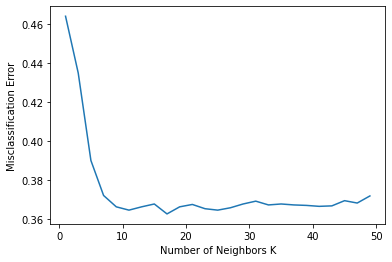

In [102]:
optimal_k = klist[np.argmin(errors)]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(klist, errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [103]:
model6 = neighbors.KNeighborsClassifier(n_neighbors=17)

model6.fit(X_train, y_train)

y_pred = model6.predict(X_test)

In [125]:
# Accuracy score
print("Test set score: {:.2f}".format(model6.score(X_test, y_test)))

Test set score: 0.62


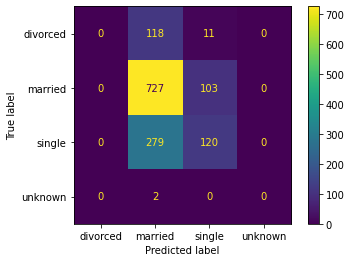

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model6,X_test,y_test)

In [105]:
print(classification_report(y_test, y_pred, labels=['married', 'single', 'divorced', 'unknown']))

              precision    recall  f1-score   support

     married       0.65      0.88      0.74       830
      single       0.51      0.30      0.38       399
    divorced       0.00      0.00      0.00       129
     unknown       0.00      0.00      0.00         2

    accuracy                           0.62      1360
   macro avg       0.29      0.29      0.28      1360
weighted avg       0.54      0.62      0.56      1360



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Question 5

In [106]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [107]:
#Let's verify that the dataset is still what it needs to be:
df2.head()

,age,duration,campaign,pdays,previous,marital
0,30,487,2,999,0,married
1,39,346,4,999,0,single
2,25,227,1,999,0,married
3,38,17,3,999,0,married
4,47,58,1,999,0,married


In [108]:
df2.dtypes

age          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
marital     object
dtype: object

In [109]:
df2_train, df2_test = train_test_split(df2, test_size = 0.2)
print(df2_train)
print(df2_test)

      age  duration  campaign  pdays  previous  marital
2423   48        67         2    999         0  married
2288   35        36         1    999         0  married
77     38       459         2    999         0   single
3524   39       215         1    999         0  married
1812   59       146         1    999         0  married
...   ...       ...       ...    ...       ...      ...
840    58       233         2    999         0  married
3374   32       259         2    999         0  married
1253   45       134         8    999         0  married
1121   29       716         2    999         0   single
239    55       185         1    999         0  married

[3295 rows x 6 columns]
      age  duration  campaign  pdays  previous  marital
2098   55       452         2    999         0  married
3184   31       424         2    999         0   single
2275   44       135         2    999         0  married
951    31       113         2    999         0   single
2195   31       167    

In [110]:
df2_train_np = np.array([df2_train])
df2_test_np = np.array([df2_test])

In [111]:
df2_naivebayes = GaussianNB()
df2_naivebayes

GaussianNB()

In [112]:
df2_train.drop('marital',axis=1)

,age,duration,campaign,pdays,previous
2423,48,67,2,999,0
2288,35,36,1,999,0
77,38,459,2,999,0
3524,39,215,1,999,0
1812,59,146,1,999,0
...,...,...,...,...,...
840,58,233,2,999,0
3374,32,259,2,999,0
1253,45,134,8,999,0
1121,29,716,2,999,0


In [113]:
df2_train['marital']

2423    married
2288    married
77       single
3524    married
1812    married
         ...   
840     married
3374    married
1253    married
1121     single
239     married
Name: marital, Length: 3295, dtype: object

In [114]:
df2_naivebayes.fit(df2_train.drop('marital',axis=1), df2_train['marital'])

GaussianNB()

In [126]:
df2_predictions = df2_naivebayes.predict(df2_test.drop('marital',axis=1))
accuracy_score(df2_test['marital'], df2_predictions)

0.03762135922330097

In [116]:
realvsmodel2 = pd.DataFrame(df2_predictions,df2_test)
realvsmodel2 = pd.DataFrame({'predicted':df2_predictions,'original':df2_test['marital']})
realvsmodel2.head()

,predicted,original
2098,unknown,married
3184,unknown,single
2275,unknown,married
951,unknown,single
2195,unknown,single


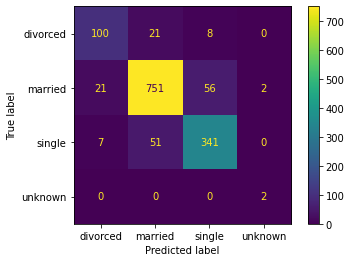

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model1,X_test,y_test)

In [133]:
print(classification_report(y_test, y_pred, labels=['married', 'single', 'divorced', 'unknown']))

              precision    recall  f1-score   support

     married       0.65      0.88      0.74       830
      single       0.51      0.30      0.38       399
    divorced       0.00      0.00      0.00       129
     unknown       0.00      0.00      0.00         2

    accuracy                           0.62      1360
   macro avg       0.29      0.29      0.28      1360
weighted avg       0.54      0.62      0.56      1360



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The first confusion matrix had the most diversity in color in ranges for predicted values, while the confusion matrix for the optimized k and Naive Bayes had hardly anything to show for other than 1 to 1 relationships with many values in the matrix with very small values. This shows the differnece with how the independent variables are related to the independent when using k=1 versus the optimized value of k=17. While the classification reports show that married is the most precise of the four categories for marital in relation to age, campaign, duration, pdays and previous numeric variables in the dataset for k nearest neighbor. Along with for k nearest neighbor it had an accuracy score of .54 which isn't great but isn't bad for predicting. Meanwhile, the optimized k and Naive Bayes classification reports both had a higher precision for married than k nearnest neighbor and a much higher precision value for single while the divorced and unknown were 0, which differed from the precision value for divorced in the k nearest neighbor test. The Naive Bayes however had a very low accuracy test of .03, and the optimized at an accuracy of .62. Thus resulting in the k nearnest neighbor, optimized, being the test to be more trustworthy compared to the Naive Bayes or unoptimized even though it gives more uncertainity in variable relations it is much better at predicting, which is important and that is what the manager wants to have. 